In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

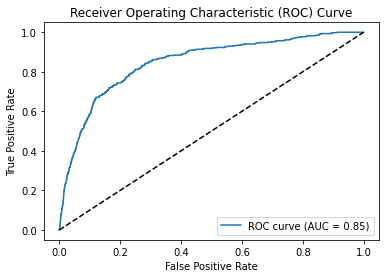

In [4]:
negative_df = pd.read_csv('SVM_SEL_5_neg_02.csv')
positive_df = pd.read_csv('SVM_SEL_5_pos_02.csv')

# Add a column 'Labels' filled with zeros for the negative DataFrame
negative_df = negative_df.assign(Labels=0)

# Add a column 'Labels' filled with ones for the positive DataFrame
positive_df = positive_df.assign(Labels=1)

df = pd.concat([negative_df, positive_df], ignore_index=True)

#print(df.shape)
#print(df.head)

true_labels = df['Labels']
predicted_scores = df['#SCORE']

fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)

auc = roc_auc_score(true_labels, predicted_scores)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()